In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1

In [5]:
HI = 0.09
pS = 0.1
HS = 2 * pS * (1 - pS)
pT = 0.2
HT = 2 * pT * (1 - pT)

FIS = 1 - HI / HS
FIT = 1 - HI / HT
FST = 1 - HS / HT

FIS, FIT, FST

(0.5, 0.71875, 0.4375)

## Question 2

In [27]:
genotypes = np.array([
    [2, 21, 31],
    [48, 12, 1]
])
p_populations = (genotypes[:,0] * 2 + genotypes[:,1]) / (genotypes.sum(axis=1) * 2)
p_all = (genotypes[:,0].sum() * 2 + genotypes[:,1].sum()) / (genotypes.sum() * 2)

obs_het = genotypes[:,1] / genotypes.sum(axis=1)
exp_het = 2 * p_populations * (1 - p_populations)
exp_het_all = 2 * p_all * (1 - p_all)

FIS_blue_winged = 1 - obs_het[0] / exp_het[0]
print(FIS_blue_winged)

FST_blue = 1 - exp_het[0] / exp_het_all
print(FST_blue)

FST_golden = 1 - exp_het[1] / exp_het_all
print(np.mean([FST_blue, FST_golden]))


-0.0930120481927712
0.2705376408226029
0.4269951210938961


## Question 3

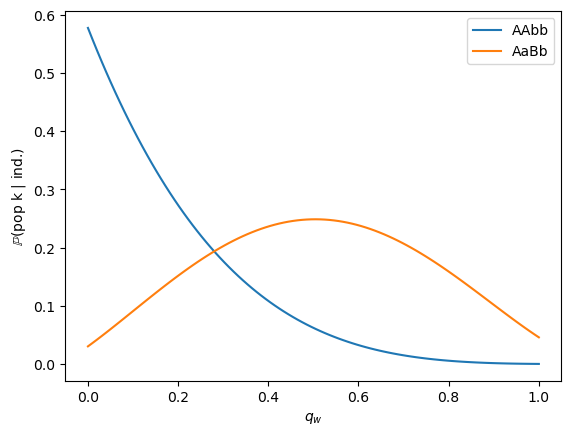

In [ ]:
# 1 row per population, 1 column per locus
p = np.array([[0.1, 0.85], 
              [0.95, 0.2]])

def posterior(q_w, gt):
    # transform q_w so it fits to p
    q_w = np.repeat(q_w[:, np.newaxis], 2, axis=1)
    
    # Calculate frequencies of an imagined population with q_w
    p_new = (p[0] - p[1]) * q_w + p[1]
    p_new = p_new.T
    
    # calculate product of individual loci
    p_ind_pop = np.ones(q_w.shape[0])
    for i in range(len(gt)):
        if gt[i] == 0:
            p_ind_pop *= p_new[i]**2
        if gt[i] == 1:
            p_ind_pop *= 2 * p_new[i] * (1 - p_new[i])
        if gt[i] == 2:
            p_ind_pop *= (1 - p_new[i])**2
        
    return p_ind_pop

# 100 values between 0 and 1
q_w = np.linspace(0, 1, 100)
# calculate for examples (AA, bb)
post1 = posterior(q_w, [0, 2])
# calculate for heterozygot (Aa, Bb)
post2 = posterior(q_w, [1, 1])

# Plotting
plt.plot(q_w, post1, label='AAbb')
plt.plot(q_w, post2, label='AaBb')

plt.xlabel('$q_w$')
plt.ylabel('$\mathbb{P}$(pop k | ind.)')
plt.legend()

## Question 4

| Pop | pAB  | pAb  | paB  | pab  | pA   | pB    | D    |
|-----|------|------|------|------|------|-------|------|
|  1  | 0.02 | 0.18 | 0.08 | 0.72 | 0.2  | 0.1   | 0.02 - 0.2 * 0.1 = 0 |
|  2  | 0.72 | 0.18 | 0.08 | 0.02 | 0.9  | 0.8   | 0.72 - 0.9 * 0.8 = 0 |
| 1/2 | 0.37 | 0.18 | 0.08 | 0.37 | 0.37 + 0.18 = 0.55 | 0.37 + 0.08 = 0.45  | 0.37 - (0.55) * (0.45) = 0.1225 |
 

## Question 5

In [ ]:
D0 = 0.1225
Dt = 0.0723
c = 0.1

np.log(Dt / D0) / (-c)

np.float64(5.272869008200625)

## Question 6

**A)** FIS > FST

**B)** FIS > FST

**C)** FIS < FST

## Question 7

In [ ]:
t = 60
p_past = np.array([[0.69, 0], 
                   [0.09, 0.22]])

p_now = np.array([[0.5452, 0.1448],
                  [0.2348, 0.0752]])

p_now = np.random.random(4).reshape([2, 2]) 
p_now = p_now / np.sum(p_now) 

def D(p):
    pA = p[0,0] + p[0,1]
    pB = p[0,0] + p[1,0]
    
    return p[0,0] - pA * pB

D0 = D(p_past)
Dt = D(p_now)

-np.log(Dt / D0) / t, D0, Dt

[[0.13023782 0.04001178]
 [0.39107534 0.43867506]]


(np.float64(0.021620748890875282),
 np.float64(0.15180000000000005),
 np.float64(0.041484461337066))